# Workflow 2

### Import est_lib Functions

In [8]:
from est_lib.util.obspy_util import *
from est_lib.util.obspy_plot import *

### Specify Search Parameters

In [10]:
'''
Specify a list of CNSN stations that are of interest.

Refer to the following link to get a full list of CNSN stations
https://earthquakescanada.nrcan.gc.ca/stndon/CNSN-RNSC/stnbook-cahierstn/index-en.php
'''
station_list = ['BFSB','CBB','CLRS','HOLB','HOPB','LLLB','NLLB',
                'NTKA','PACB','PHC','PTRF','SNB','SYMB','VGZ','WOSB']


'''
Specify a Time of interest. Note that that the timestamp
is in UTC.
'''
event_time = '2020-05-23T02:14:48'
event_lat = 50.178
event_lon = -129.816

### Retrieve Station Metadata

In [3]:
'''
Use the inventory_retriever function to retrieve
metadata about stations in station_list
'''
station_metadata = inventory_retriever(sta_list=station_list)

In [4]:
print(station_metadata)

Inventory created at 2021-08-06T00:12:55.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.47
		    http://service.iris.edu/fdsnws/station/1/query?network=CN&station=B...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			CN
		Stations (15):
			CN.BFSB (Boischatel, QC, CA)
			CN.CBB (Campbell River, BC, CA)
			CN.CLRS (Cowichan Lake Research St, BC, CA)
			CN.HOLB (Holberg, BC, CA)
			CN.HOPB (Hope, BC, CA)
			CN.LLLB (Lillooet, BC, CA)
			CN.NLLB (Nanaimo Lost Lake, BC, CA)
			CN.NTKA (Nootka, BC, CA)
			CN.PACB (Port Alice, BC, CA)
			CN.PHC (Port Hardy, BC, CA)
			CN.PTRF (Port Renfrew PTRF, BC, CA)
			CN.SNB (Saturna Island, BC, CA)
			CN.SYMB (Survey Mountain, BC, CA)
			CN.VGZ (Victoria Gonzales, BC, CA)
			CN.WOSB (Woss, BC, CA)
		Channels (253):
			CN.BFSB..HHZ (2x), CN.BFSB..HHN (2x), CN.BFSB..HHE (2x), 
			CN.BFSB..HNZ (2x), CN.BFSB..HNN (2x), CN.BFSB..HNE (2x), 
			CN.CBB..BHZ (5x), CN.CBB..BHN (5x), CN.CBB..BHE (5x), CN.CBB..HHZ, 
			

### Retrieve Seismic Streams

In [13]:
'''
Use the stream_retriever function to retrieve
seismic streams from an IRIS' FDSN compliant
datacenter.

We instruct the function to fetch data starting
from 500 seconds before the specified time upto
150 seconds after.

That is, if the time of interest is at 0, we
fetch data from -500 to 150.
'''
data = stream_retriever(event_time=event_time,
                        time_format='string',
                        seconds_before = 500,
                        seconds_after = 2000,
                        sta_list = station_list,
                        channel_list = ['HHE'])

# Note: channel_list specifies the channels of interest
#    In this example, we retrieve velocity data for 
#    all three directions (E, N and Z). To get acceleration
#    data replace with ['HNE','HNN','HNZ']

In [14]:
print(data)

15 Trace(s) in Stream:
CN.BFSB..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.CBB..HHE  | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.CLRS..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.HOLB..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.HOPB..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.LLLB..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.NLLB..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.NTKA..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.PACB..HHE | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 100.0 Hz, 200001 samples
CN.PHC..HHE  | 2020-05-23T02:06:28.000000Z - 2020-05-23T02:39:48.000000Z | 10

### Visualize Stream Object

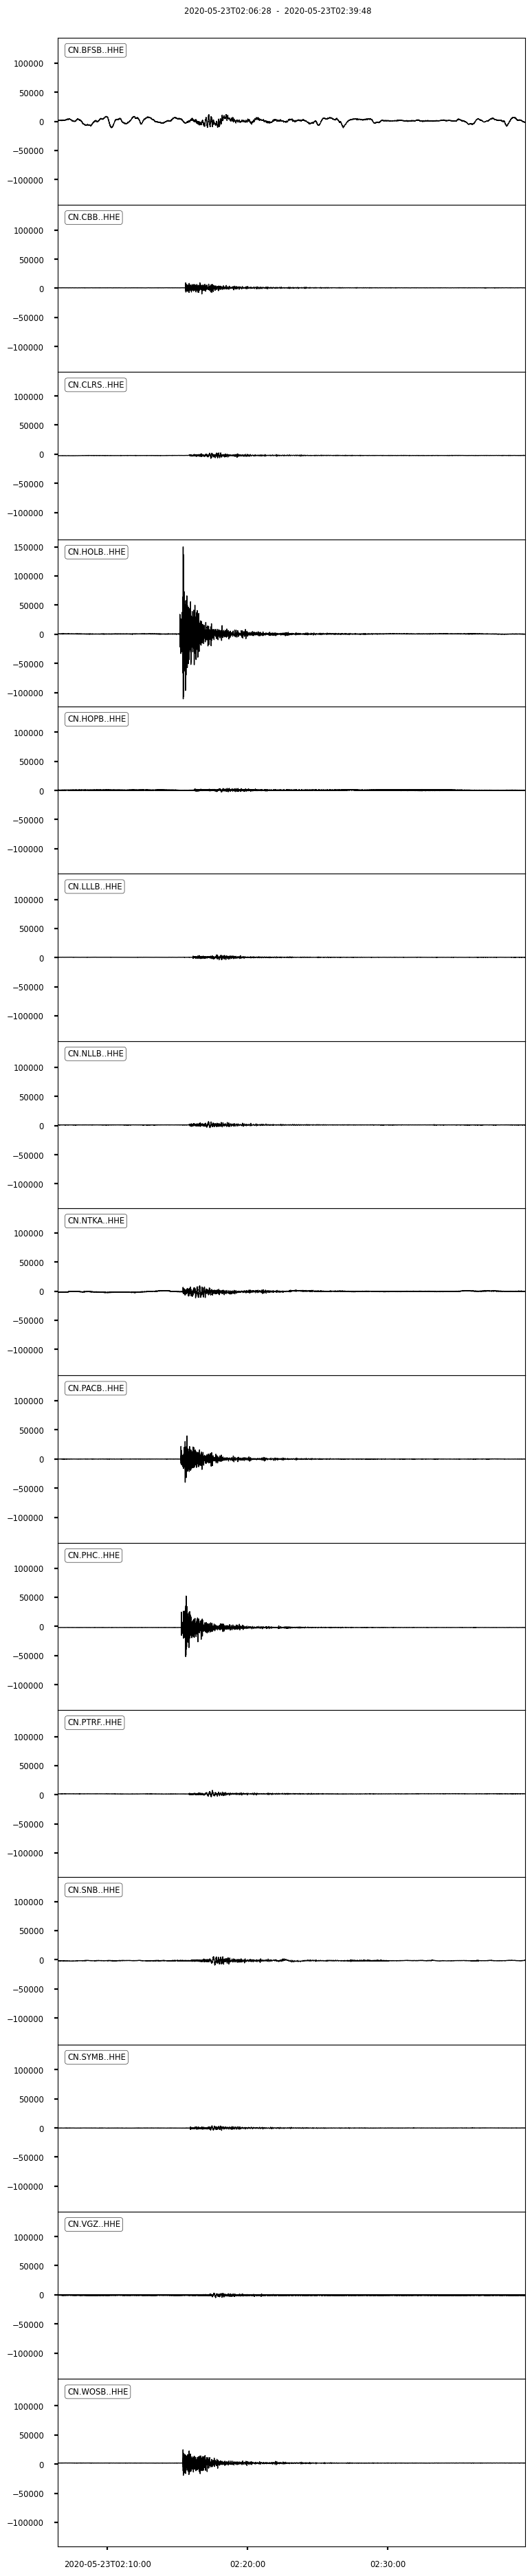

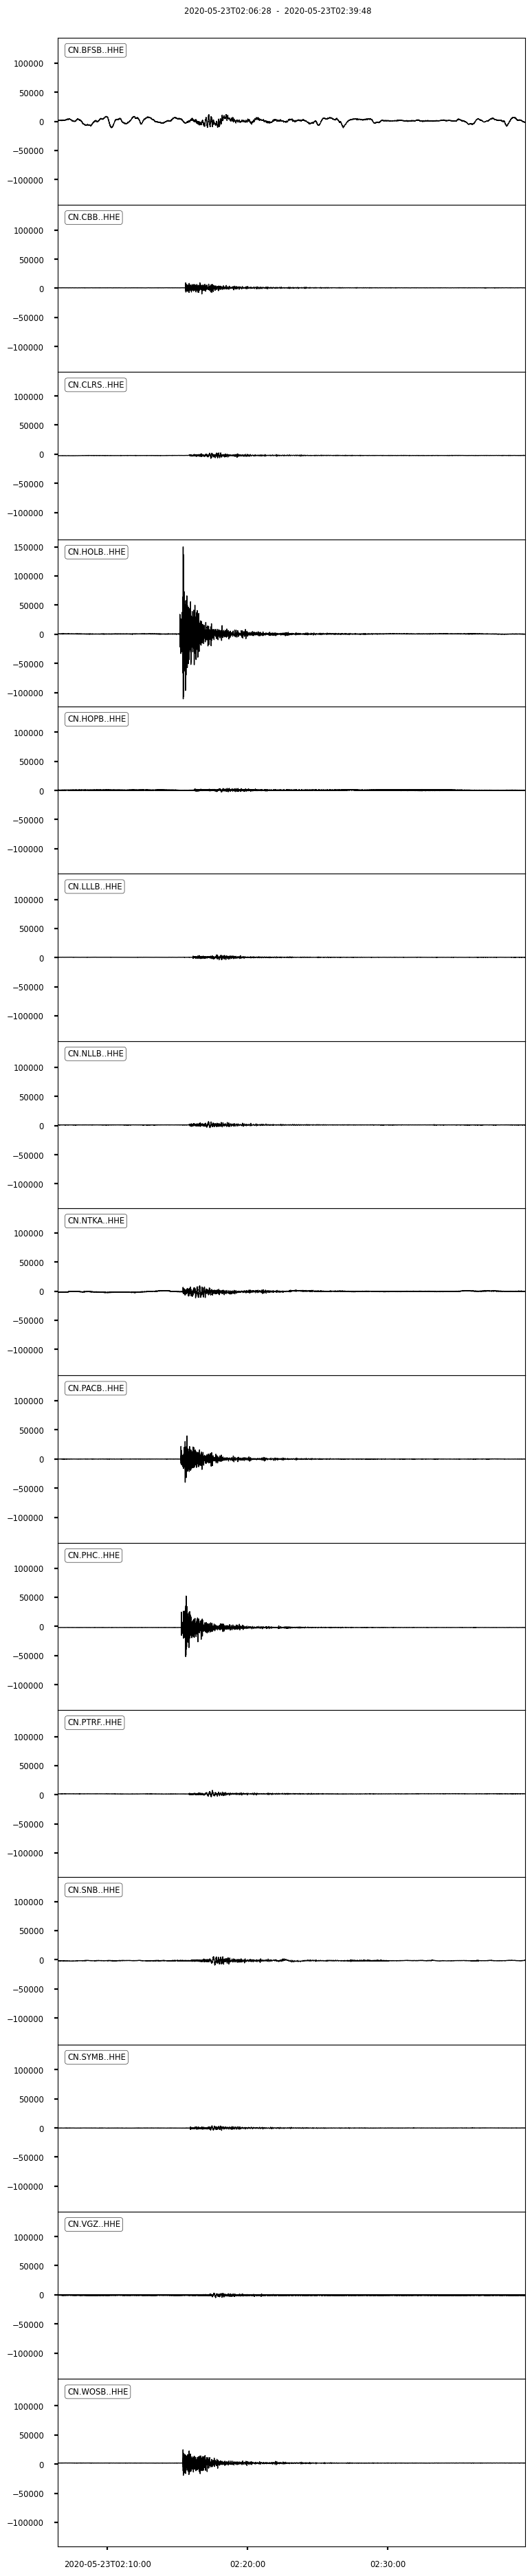

In [15]:
data.plot()

### Visualize Stations

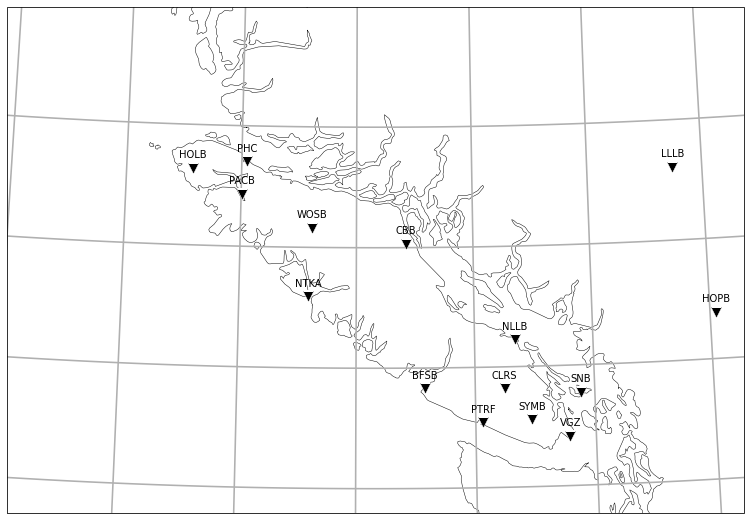

In [16]:
op = adj_plot(
        min_lat=47.8, max_lat=52,
        min_lon=-130.5,max_lon=-121,
        streams=data,
        inventory=station_metadata)

### View Ray Plot

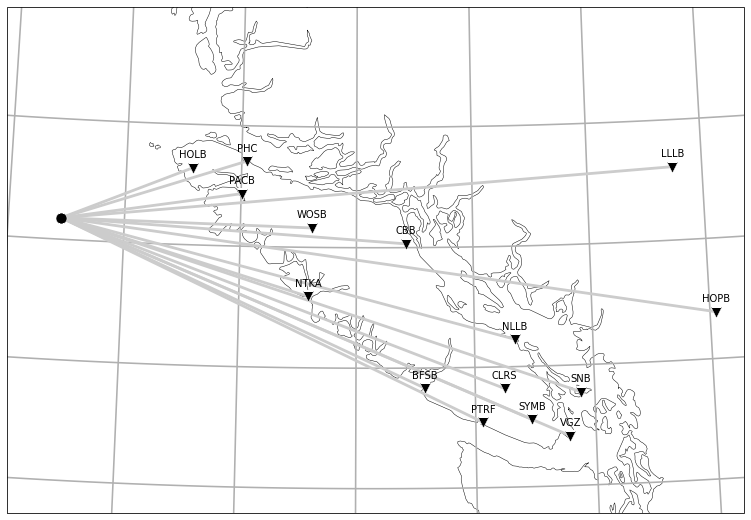

In [17]:
op = ray_plot(
        ev_lat=event_lat,
        ev_lon=event_lon,
        streams=data,
        inventory=station_metadata)

### View Offset Plot for East - West Channel

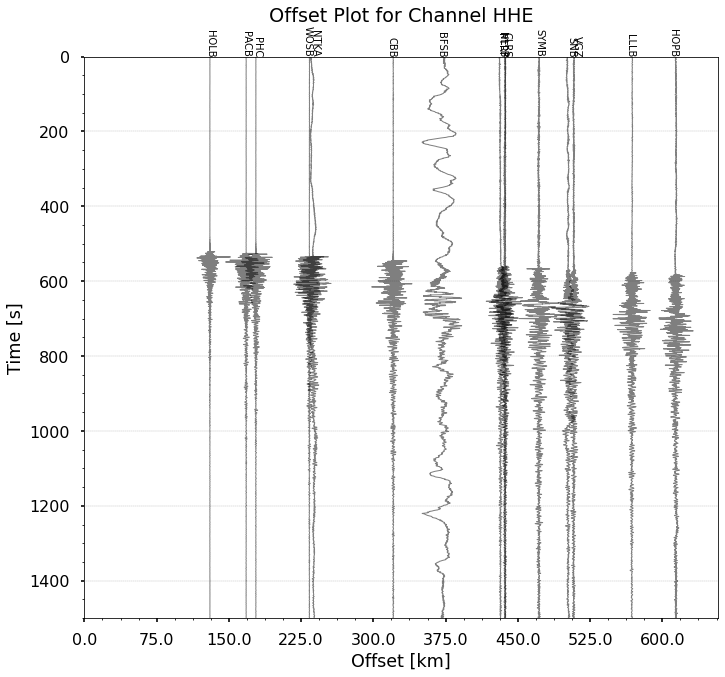

In [18]:
op = gen_offset_plot(inventory=station_metadata,
                    streams=data,
                    channels='HHE',ev_lat=event_lat,
                    ev_lon=event_lon)